![Logo dell'Università XYZ](img/logo.jpg)

# Advanced Financial Modeling Course

## Introduction

This notebook is part of the teaching material of the Advanced Financial Modeling course! In this series of Jupyter notebooks, we will cover various topics related to financial modeling, including fundamental concepts, practical applications, and hands-on exercises.

### Notebooks Overview

1. [Notebook 1: Curve Building](notebooks/notebook1.ipynb)
2. [Notebook 2: AAD-Greeks](notebooks/notebook2.ipynb)
3. [Notebook 3: Swap AAD Sensitivities](notebooks/notebook3.ipynb)
3. [Notebook 4: Simulation of Extended Short-Rate Models](notebooks/notebook3.ipynb)
4. [Notebook 5: Model Calibration](notebooks/notebook4.ipynb)
5. [Notebook 6: SABR stochastic volatility](notebooks/notebook5.ipynb)
5. [Notebook 7: xVA--CCR simulation](notebooks/notebook5.ipynb)


## Notebook 6: SABR stochastic volatility 

This notebook delves into the SABR (Stochastic Alpha Beta Rho) model, a popular stochastic volatility model used in financial derivatives pricing, particularly in the context of interest rate options.

### Topics Covered

- Introduction to the SABR model
- Understanding stochastic volatility
- Key parameters of the SABR model: alpha, beta, rho, and nu
- Calibration of the SABR model to market data
- Pricing interest rate options using the SABR model
- Implement SABR model in Python using QuantLib.



## Import Libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import QuantLib as ql 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Define functions

In [2]:
def haganLogNormalApprox (y, expiry , F_0 , alpha_0 , beta ,nu , rho ):
    """
    Function which returns the Black implied volatility ,
    computed using the Hagan et al. lognormal
    approximation .
    @var y: option strike
    @var expiry: option expiry (in years)
    @var F_0: forward interest rate
    @var alpha_0: SABR Alpha at t=0
    @var beta : SABR Beta
    @var rho: SABR Rho
    @var nu: SABR Nu
    """
    one_beta = 1.0 - beta
    one_betasqr = one_beta * one_beta
    if F_0 != y:
        fK = F_0 * y
        fK_beta = math .pow(fK , one_beta / 2.0)
        log_fK = math .log(F_0 / y)
        z = nu / alpha_0 * fK_beta * log_fK
        x = math .log (( math .sqrt (1.0 - 2.0 * rho *
        z + z * z) + z - rho) / (1 - rho))
        sigma_l = (alpha_0 / fK_beta / (1.0 + one_betasqr /
        24.0 * log_fK * log_fK +
        math .pow( one_beta * log_fK , 4) / 1920.0) *
        (z / x))
        sigma_exp = ( one_betasqr / 24.0 * alpha_0 * alpha_0 /
        fK_beta / fK_beta + 0.25 * rho * beta *
        nu * alpha_0 / fK_beta +
        (2.0 - 3.0 * rho * rho) / 24.0 * nu * nu)
        sigma = sigma_l * ( 1.0 + sigma_exp * expiry)
    else:
        f_beta = math .pow(F_0 , one_beta)
        f_two_beta = math .pow(F_0 , (2.0 - 2.0 * beta ))
        sigma = (( alpha_0 / f_beta) * (1.0 +
        (( one_betasqr / 24.0) *
        ( alpha_0 * alpha_0 / f_two_beta ) +
        (0.25 * rho * beta * nu * alpha_0 / f_beta) +
        (2.0 - 3.0 * rho * rho) /
        24.0 * nu * nu) * expiry))
    return sigma

def get_smile(F, T, alpha , beta ,nu , rho):
    strikes = np.linspace(0.01, 0.08, num = 20)
    smile = [ql.sabrVolatility(y, F, T, alpha, beta, nu, rho) for y in strikes]
    return strikes, np.array(smile)

## SABR Parameters

In [3]:
alpha = 0.1
beta = 0.7
nu = 0.6
rho = -0.1

F_0 = 0.04
K = 0.04
expiry = 5

### Alpha

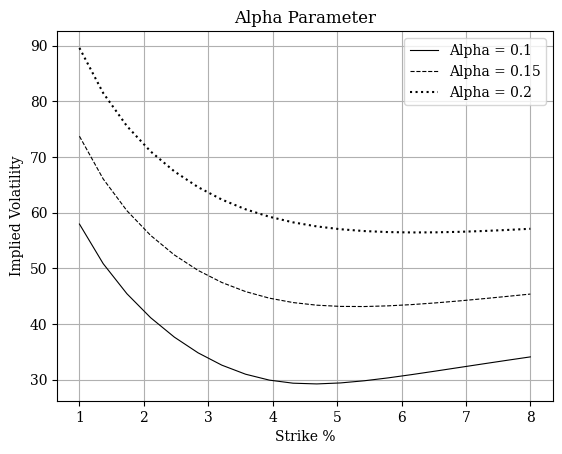

In [4]:
alpha_sample = [0.1, 0.15, 0.2, 0.25]
alpha_sample_vols = [get_smile(F_0, expiry, a , beta ,nu , rho) for a in alpha_sample]



strikes = alpha_sample_vols[0][0]

plt.title('Alpha Parameter')
plt.plot(strikes*100, 100*alpha_sample_vols[0][1], label = f"Alpha = {alpha_sample[0]}", color = 'black',
        linewidth = 0.8)
plt.plot(strikes*100, 100*alpha_sample_vols[1][1], label = f"Alpha = {alpha_sample[1]}", color = 'black',
         linestyle='dashed', linewidth = 0.8)
plt.plot(strikes*100, 100*alpha_sample_vols[2][1], label = f"Alpha = {alpha_sample[2]}", color = 'black',
         linestyle='dotted')

plt.xlabel('Strike %')
plt.ylabel('Implied Volatility')

plt.grid()
plt.legend()
plt.show()

### Beta

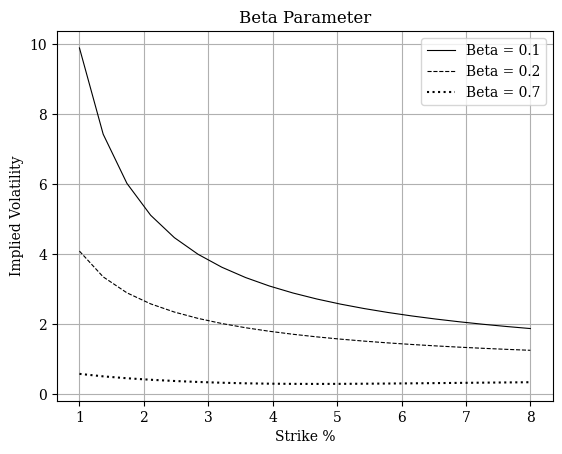

In [5]:
beta_sample = [0.1, 0.2, 0.7]
beta_sample_vols = [get_smile(F_0, expiry, alpha , b ,nu , rho) for b in beta_sample]



strikes = beta_sample_vols[0][0]

plt.title('Beta Parameter')
plt.plot(strikes*100, beta_sample_vols[0][1], label = f"Beta = {beta_sample[0]}", color = 'black',
        linewidth = 0.8)
plt.plot(strikes*100, beta_sample_vols[1][1], label = f"Beta = {beta_sample[1]}", color = 'black',
         linestyle='dashed', linewidth = 0.8)
plt.plot(strikes*100, beta_sample_vols[2][1], label = f"Beta = {beta_sample[2]}", color = 'black',
         linestyle='dotted')
plt.xlabel('Strike %')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

### Nu

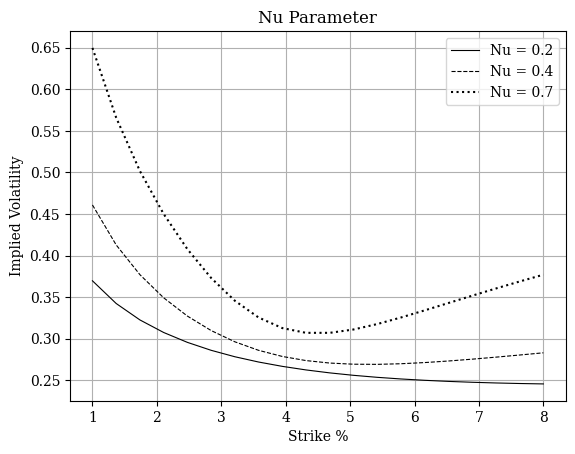

In [6]:
nu_sample = [0.2, 0.4, 0.7]
nu_sample_vols = [get_smile(F_0, expiry, alpha , beta ,n , rho) for n in nu_sample]



strikes = beta_sample_vols[0][0]

plt.title('Nu Parameter')
plt.plot(strikes*100, nu_sample_vols[0][1], label = f"Nu = {nu_sample[0]}", color = 'black',
        linewidth = 0.8)
plt.plot(strikes*100, nu_sample_vols[1][1], label = f"Nu = {nu_sample[1]}", color = 'black',
         linestyle='dashed', linewidth = 0.8)
plt.plot(strikes*100, nu_sample_vols[2][1], label = f"Nu = {nu_sample[2]}", color = 'black',
         linestyle='dotted')
plt.xlabel('Strike %')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

### Rho

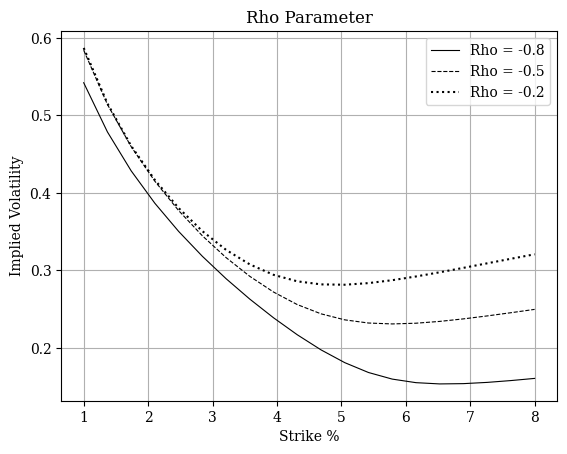

In [7]:
rho_sample = [-0.8, -0.5, -0.2]
rho_sample_vols = [get_smile(F_0, expiry, alpha , beta ,nu , r) for r in rho_sample]



strikes = beta_sample_vols[0][0]

plt.title('Rho Parameter')
plt.plot(strikes*100, rho_sample_vols[0][1], label = f"Rho = {rho_sample[0]}", color = 'black',
        linewidth = 0.8)
plt.plot(strikes*100, rho_sample_vols[1][1], label = f"Rho = {rho_sample[1]}", color = 'black',
         linestyle='dashed', linewidth = 0.8)
plt.plot(strikes*100, rho_sample_vols[2][1], label = f"Rho = {rho_sample[2]}", color = 'black',
         linestyle='dotted')

plt.xlabel('Strike %')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()